Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [8]:
import pandas as pd

df_yelp = pd.read_csv('yelp_dataframe.csv')
df_fsq = pd.read_csv('foursquare_dataframe.csv')
df_yelp_copy = pd.read_csv('yelp_clean_copy_dataframe.csv')
df_fsq_copy = pd.read_csv('foursquare_clean_copy_dataframe.csv')
df_citybikes = pd.read_csv('citybikes_dataframe.csv')

In [14]:
df_fsq_copy.shape


(2565, 5)

In [13]:
df_yelp_copy.shape

(3422, 7)

In [17]:
df_citybikes.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)


In [25]:
# Joining dataframes

citybikes_yelp_joined = pd.merge(df_citybikes, df_yelp_copy, how='right', on=['latitude', 'longitude'])
citybikes_fsq_joined = pd.merge(df_citybikes, df_fsq_copy, how='right', on=['latitude', 'longitude'])


In [26]:
citybikes_yelp_joined

,latitude,longitude,Number of Bikes,business_name,categories,address,rating,review_count
0,34.033663,-118.229245,NaN,Bestia,"Italian, Cocktail Bars, Pizza","2121 E 7th Pl, Los Angeles, CA 90021",4.5,7531
1,34.034456,-118.232130,NaN,Guerrilla Tacos,"Tacos, Cocktail Bars, Beer Bar","2000 E 7th St, Los Angeles, CA 90021",4.0,1152
2,34.035170,-118.232180,NaN,Afuri Ramen Dumpling,"Ramen, Noodles","688 Mateo St, Los Angeles, CA 90021",4.0,488
3,34.033941,-118.229608,NaN,Yangban,"Korean, American (New)","712 S Santa Fe Ave, Los Angeles, CA 90021",4.0,283
4,34.040190,-118.233569,NaN,Girl & The Goat - Los Angeles,American (New),"555-3 Mateo St, Ste 300, Los Angeles, CA 90013",4.5,1563
...,...,...,...,...,...,...,...,...
3417,34.045880,-118.451520,NaN,moonbowls,"Korean, Gluten-Free","11419 Santa Monica Blvd, Los Angeles, CA 90025",4.0,180
3418,34.045892,-118.451511,NaN,Califlower Pizza,"Pizza, Gluten-Free, Salad","11419 Santa Monica Blvd, Los Angeles, CA 90025",4.0,41
3419,34.044579,-118.454736,NaN,Juquila Restaurant,Mexican,"11619 Santa Monica Blvd, Los Angeles, CA 90025",4.0,446
3420,34.048303,-118.443351,NaN,Hamasaku,"Japanese, Sushi Bars","11043 Santa Monica Blvd, Los Angeles, CA 90025",4.0,662


In [27]:
citybikes_fsq_joined

,latitude,longitude,Number of Bikes,business_name,categories,address
0,34.034828,-118.231642,NaN,Pizzanista,Pizzeria,"2019 E 7th St, Los Angeles, CA 90021"
1,34.035250,-118.232145,NaN,Afuri Ramen,Ramen Restaurant,"688 Mateo St, Los Angeles, CA 90021"
2,34.034444,-118.231989,NaN,Guerrilla Tacos,Mexican Restaurant,"2000 E 7th St, Los Angeles, CA 90021"
3,34.034290,-118.232552,NaN,Everson Rocye Bar,"Cocktail Bar, Wine Bar, Restaurant","1936 E 7th St, Los Angeles, CA 90021"
4,34.034349,-118.229794,NaN,Bread Lounge,Bakery,"700 S Santa Fe Ave, Los Angeles, CA 90021"
...,...,...,...,...,...,...
2560,33.992267,-118.451477,NaN,Church of St Mark,Church,"940 Coeur D Alene Ave (at Lincoln Blvd), Venic..."
2561,33.994564,-118.439159,NaN,Kustaa Cheese & Wine,"Cheese Store, Liquor Store, Wine Store","12954 W Washington Blvd, Los Angeles, CA 90066"
2562,33.994564,-118.439159,NaN,Rediscover Center,Non-Profit Organization,"12958 W Washington Blvd, Los Angeles, CA 90066"
2563,34.046129,-118.450589,NaN,The Nickel Mine,"Cocktail Bar, Sports Bar, Pizzeria","11363 Santa Monica Blvd (at Purdue), Los Angel..."


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [28]:
df_citybikes

,latitude,longitude,Number of Bikes
0,34.03480,-118.23128,11
1,34.03919,-118.23253,10
2,34.04989,-118.25588,11
3,34.05772,-118.24897,6
4,34.03286,-118.26808,9
...,...,...,...
218,34.04804,-118.25374,4
219,34.00587,-118.42916,5
220,34.06699,-118.29088,4
221,33.99724,-118.44673,4


In [34]:
# Top coordinates that had the most bikes in a certain area
top_bike_locations = df_citybikes.groupby(['latitude', 'longitude'])['Number of Bikes'].sum().reset_index().sort_values(by='Number of Bikes', ascending=False).head(20)
top_bike_locations

,latitude,longitude,Number of Bikes
116,34.04850,-118.25854,22
136,34.05661,-118.23721,21
89,34.03998,-118.26640,20
25,33.99834,-118.46101,18
36,34.01431,-118.49134,18
23,33.99624,-118.47745,15
102,34.04554,-118.25667,14
201,34.10200,-118.33741,14
179,34.08371,-118.29602,14
160,34.06335,-118.29680,13


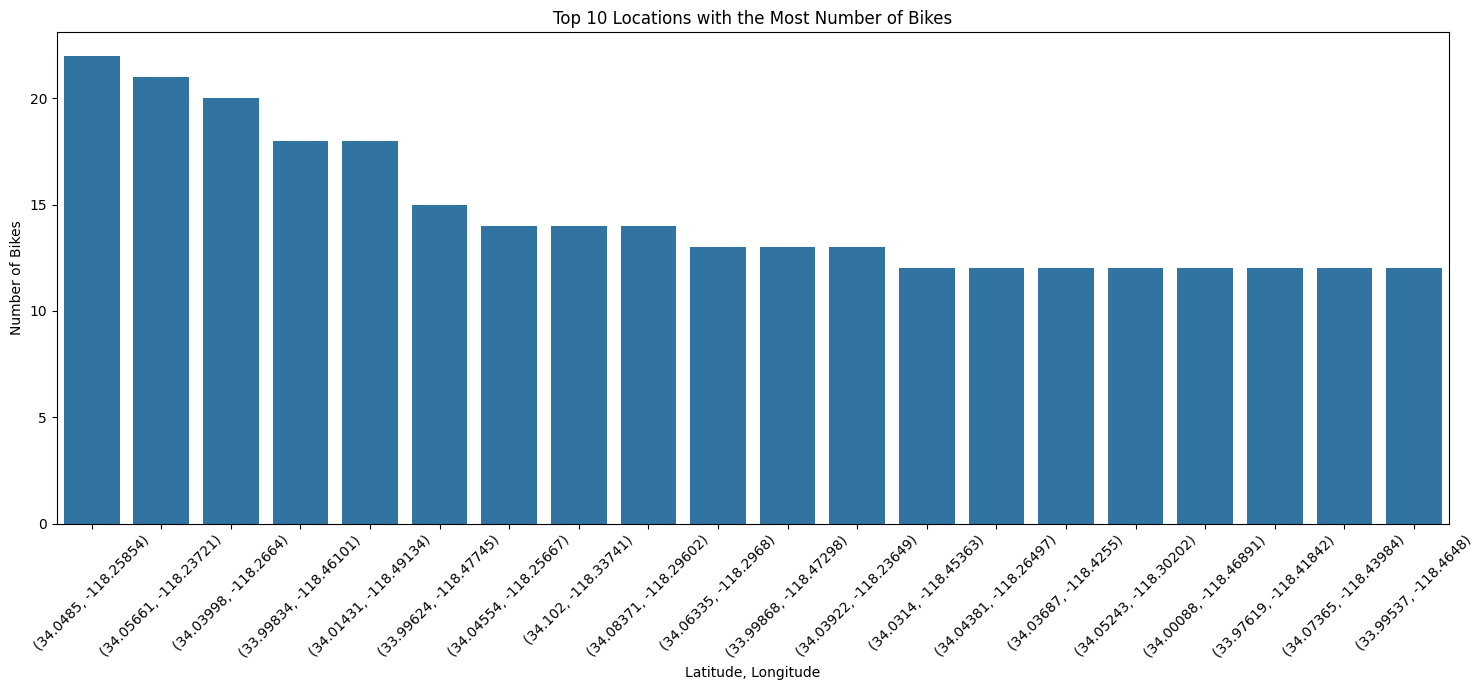

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

top_bike_locations['lat_lon'] = '(' + top_bike_locations['latitude'].astype(str) + ', ' + top_bike_locations['longitude'].astype(str) + ')'

plt.figure(figsize=(15,7))
sns.barplot(x=top_bike_locations['lat_lon'], y=top_bike_locations['Number of Bikes'])
plt.xticks(rotation=45)
plt.title('Top 10 Locations with the Most Number of Bikes')
plt.xlabel('Latitude, Longitude')
plt.ylabel('Number of Bikes')
plt.tight_layout()
plt.show()


In [38]:
# Now lets find the top 20 locations with the most amount of bikes
yelp_bikes_merged = pd.merge(top_bike_locations, df_yelp_copy, on=['latitude', 'longitude'], how='left')
fsq_bikes_merged = pd.merge(top_bike_locations, df_fsq_copy, on=['latitude', 'longitude'], how='left')


In [39]:
yelp_bikes_merged

,latitude,longitude,Number of Bikes,lat_lon,business_name,categories,address,rating,review_count
0,34.04850,-118.25854,22,"(34.0485, -118.25854)",NaN,NaN,NaN,NaN,NaN
1,34.05661,-118.23721,21,"(34.05661, -118.23721)",NaN,NaN,NaN,NaN,NaN
2,34.03998,-118.26640,20,"(34.03998, -118.2664)",NaN,NaN,NaN,NaN,NaN
3,33.99834,-118.46101,18,"(33.99834, -118.46101)",NaN,NaN,NaN,NaN,NaN
4,34.01431,-118.49134,18,"(34.01431, -118.49134)",NaN,NaN,NaN,NaN,NaN
5,33.99624,-118.47745,15,"(33.99624, -118.47745)",NaN,NaN,NaN,NaN,NaN
6,34.04554,-118.25667,14,"(34.04554, -118.25667)",NaN,NaN,NaN,NaN,NaN
7,34.10200,-118.33741,14,"(34.102, -118.33741)",NaN,NaN,NaN,NaN,NaN
8,34.08371,-118.29602,14,"(34.08371, -118.29602)",NaN,NaN,NaN,NaN,NaN
9,34.06335,-118.29680,13,"(34.06335, -118.2968)",NaN,NaN,NaN,NaN,NaN


In [40]:
fsq_bikes_merged

,latitude,longitude,Number of Bikes,lat_lon,business_name,categories,address
0,34.04850,-118.25854,22,"(34.0485, -118.25854)",NaN,NaN,NaN
1,34.05661,-118.23721,21,"(34.05661, -118.23721)",NaN,NaN,NaN
2,34.03998,-118.26640,20,"(34.03998, -118.2664)",NaN,NaN,NaN
3,33.99834,-118.46101,18,"(33.99834, -118.46101)",NaN,NaN,NaN
4,34.01431,-118.49134,18,"(34.01431, -118.49134)",NaN,NaN,NaN
5,33.99624,-118.47745,15,"(33.99624, -118.47745)",NaN,NaN,NaN
6,34.04554,-118.25667,14,"(34.04554, -118.25667)",NaN,NaN,NaN
7,34.10200,-118.33741,14,"(34.102, -118.33741)",NaN,NaN,NaN
8,34.08371,-118.29602,14,"(34.08371, -118.29602)",NaN,NaN,NaN
9,34.06335,-118.29680,13,"(34.06335, -118.2968)",NaN,NaN,NaN


In [44]:
def are_points_close(lat1, lon1, lat2, lon2, threshold=0.001):
    return ((lat1 - lat2)**2 + (lon1 - lon2)**2)**0.5 < threshold # Euclidean distance to get the distance between two points

close_businesses_yelp = []
close_businesses_fsq = []

for _, bike_row in top_bike_locations.iterrows():
    
    # For Yelp
    for _, yelp_row in df_yelp_copy.iterrows():
        if are_points_close(bike_row['latitude'], bike_row['longitude'], yelp_row['latitude'], yelp_row['longitude']):
            close_businesses_yelp.append({
                'latitude': yelp_row['latitude'],
                'longitude': yelp_row['longitude'],
                'Number of Bikes': bike_row['Number of Bikes'],
                'name': yelp_row['business_name'],
                'categories': yelp_row['categories']
            })
            
    # For Foursquare        
    for _, fsq_row in df_fsq_copy.iterrows():
        if are_points_close(bike_row['latitude'], bike_row['longitude'], fsq_row['latitude'], fsq_row['longitude']):
            close_businesses_fsq.append({
                'latitude': fsq_row['latitude'],
                'longitude': fsq_row['longitude'],
                'Number of Bikes': bike_row['Number of Bikes'],
                'name': fsq_row['business_name'],
                'categories': fsq_row['categories']
            })

df_close_businesses_yelp = pd.DataFrame(close_businesses_yelp)
sorted_close_businesses_yelp = df_close_businesses_yelp.sort_values(by='Number of Bikes', ascending=False)

df_close_businesses_fsq = pd.DataFrame(close_businesses_fsq)
sorted_close_businesses_fsq = df_close_businesses_fsq.sort_values(by='Number of Bikes', ascending=False)

sorted_close_businesses_yelp

,latitude,longitude,Number of Bikes,name,categories
0,34.048028,-118.258051,22,JOEY DTLA,"Sushi Bars, Steakhouses, Wine Bars"
2,34.047821,-118.258738,22,HATCH,"Japanese, Bars, Tapas/Small Plates"
3,34.048753,-118.259127,22,Anna's Fish Market DTLA,"Seafood, Fish & Chips, Poke"
4,34.048593,-118.259170,22,Wokcano,"Chinese, Sushi Bars, Lounges"
5,34.048397,-118.258588,22,Marugame Udon-Los Angeles,"Japanese, Noodles, Asian Fusion"
...,...,...,...,...,...
69,34.044461,-118.264230,12,Nixo Patio Lounge,"American (New), Lounges"
68,34.044562,-118.265616,12,Katsuya LA Live,"Sushi Bars, Japanese"
67,34.044057,-118.265124,12,Toms Watch Bar - Los Angeles,"Sports Bars, American (Traditional), Cocktail ..."
65,34.044666,-118.264616,12,GRAMMY Museum,"Museums, Venues & Event Spaces"


In [45]:
sorted_close_businesses_fsq


,latitude,longitude,Number of Bikes,name,categories
0,34.048180,-118.258773,22,Alamo Drafthouse Downtown,Movie Theater
2,34.057455,-118.237646,21,Mr Churro,"Bakery, Fast Food Restaurant, Mexican Restaurant"
1,34.057103,-118.238065,21,La Noche Buena Restaurant,Mexican Restaurant
3,33.997690,-118.460630,18,El Pollo Loco,Fast Food Restaurant
4,33.998074,-118.460285,18,Ross Dress for Less,Clothing Store
5,33.999157,-118.461225,18,Ralphs,Grocery Store
6,33.997586,-118.460699,18,Pizza Hut,"Pizzeria, Dining and Drinking"
7,33.996222,-118.477132,15,The Rose Cafe & Market,"Café, American Restaurant"
9,34.044919,-118.256236,14,Golden Gopher,"Cocktail Bar, Lounge, BBQ Joint"
10,34.044612,-118.256301,14,Sweetgreen,"Restaurant, Vegan and Vegetarian Restaurant"


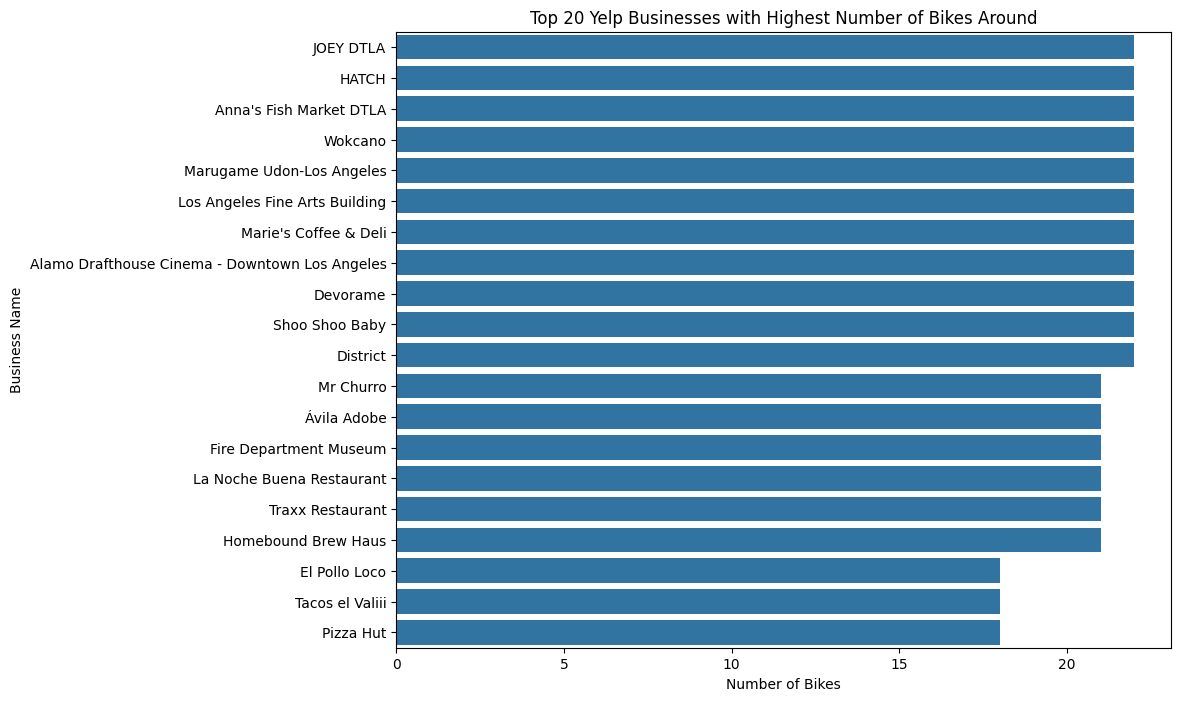

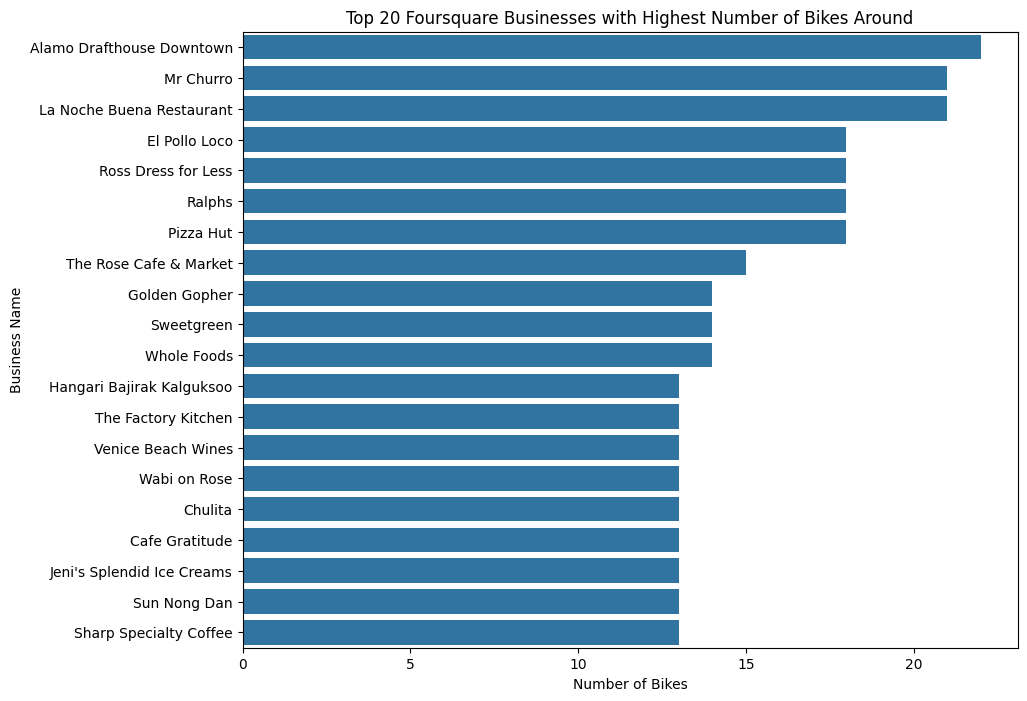

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Yelp businesses
plt.figure(figsize=(10, 8))
sns.barplot(data=sorted_close_businesses_yelp.head(20), y='name', x='Number of Bikes')
plt.title('Top 20 Yelp Businesses with Highest Number of Bikes Around')
plt.ylabel('Business Name')
plt.xlabel('Number of Bikes')
plt.show()

# Plot for Foursquare businesses
plt.figure(figsize=(10, 8))
sns.barplot(data=sorted_close_businesses_fsq.head(20), y='name', x='Number of Bikes')
plt.title('Top 20 Foursquare Businesses with Highest Number of Bikes Around')
plt.ylabel('Business Name')
plt.xlabel('Number of Bikes')
plt.show()



In [48]:
# Now, we will look for top categories for bike locations

close_categories_yelp = []
close_categories_fsq = []

for _, bike_row in top_bike_locations.iterrows():
    for _, yelp_row in df_yelp_copy.iterrows():
        if are_points_close(bike_row['latitude'], bike_row['longitude'], yelp_row['latitude'], yelp_row['longitude']):
            close_categories_yelp.append({
                'latitude': yelp_row['latitude'],
                'longitude': yelp_row['longitude'],
                'Number of Bikes': bike_row['Number of Bikes'],
                'categories': yelp_row['categories']
            })
            
    for _, fsq_row in df_fsq_copy.iterrows():
        if are_points_close(bike_row['latitude'], bike_row['longitude'], fsq_row['latitude'], fsq_row['longitude']):
            close_categories_fsq.append({
                'latitude': fsq_row['latitude'],
                'longitude': fsq_row['longitude'],
                'Number of Bikes': bike_row['Number of Bikes'],
                'categories': fsq_row['categories']
            })

df_close_categories_yelp = pd.DataFrame(close_categories_yelp).groupby('categories').sum().sort_values(by='Number of Bikes', ascending=False).reset_index()
df_close_categories_fsq = pd.DataFrame(close_categories_fsq).groupby('categories').sum().sort_values(by='Number of Bikes', ascending=False).reset_index()


In [49]:
df_close_categories_yelp

,categories,latitude,longitude,Number of Bikes
0,Museums,204.520793,-709.827562,98
1,Mexican,136.138440,-473.479465,62
2,Landmarks & Historical Buildings,68.044915,-236.737098,37
3,"Sushi Bars, Japanese",68.108341,-236.562898,25
4,"Cocktail Bars, American (Traditional), Venues ...",34.048032,-118.258386,22
...,...,...,...,...
65,"Izakaya, Sushi Bars",34.052420,-118.302150,12
66,"Steakhouses, Wine Bars, Seafood",34.044696,-118.265365,12
67,"Sports Bars, American (Traditional), Cocktail ...",34.044057,-118.265124,12
68,"Pizza, Fast Food",34.072686,-118.439683,12


In [50]:
df_close_categories_fsq

,categories,latitude,longitude,Number of Bikes
0,Grocery Store,136.022776,-473.606469,56
1,Korean Restaurant,68.126290,-236.594584,26
2,Coffee Shop,68.040317,-236.714162,25
3,Movie Theater,34.048180,-118.258773,22
4,"Bakery, Fast Food Restaurant, Mexican Restaurant",34.057455,-118.237646,21
5,Mexican Restaurant,34.057103,-118.238065,21
6,Fast Food Restaurant,33.997690,-118.460630,18
7,"Pizzeria, Dining and Drinking",33.997586,-118.460699,18
8,Clothing Store,33.998074,-118.460285,18
9,"Café, American Restaurant",33.996222,-118.477132,15


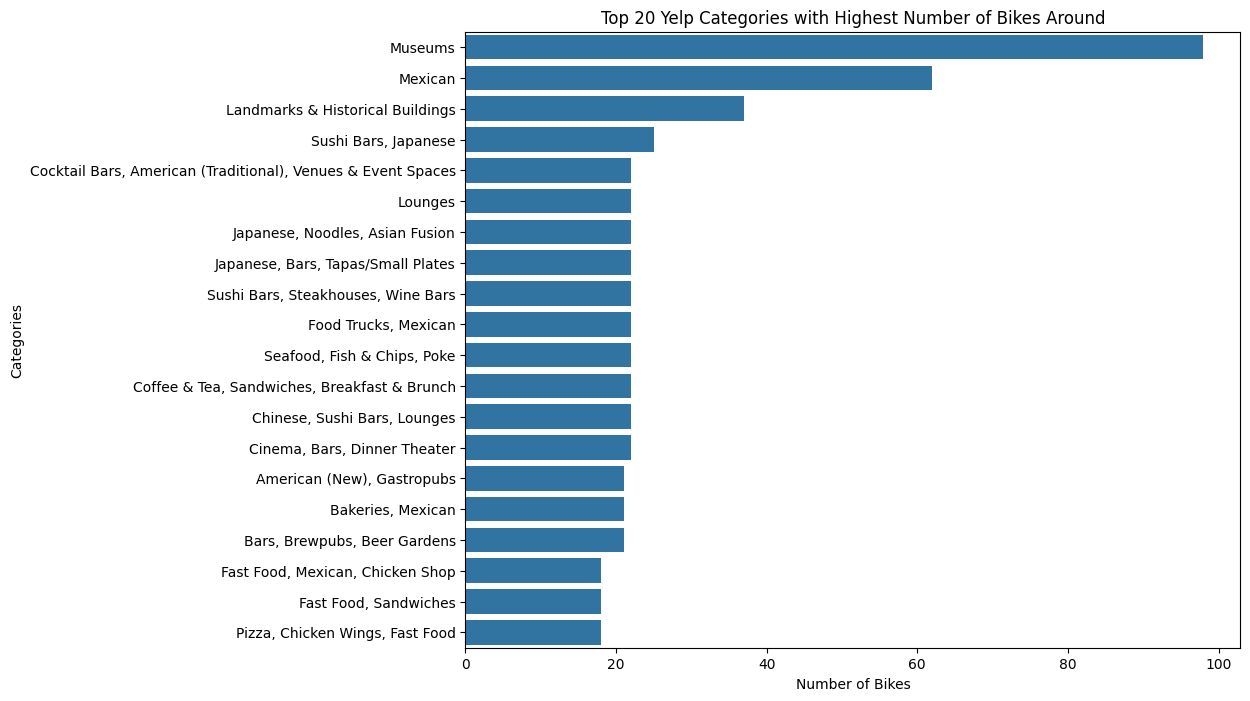

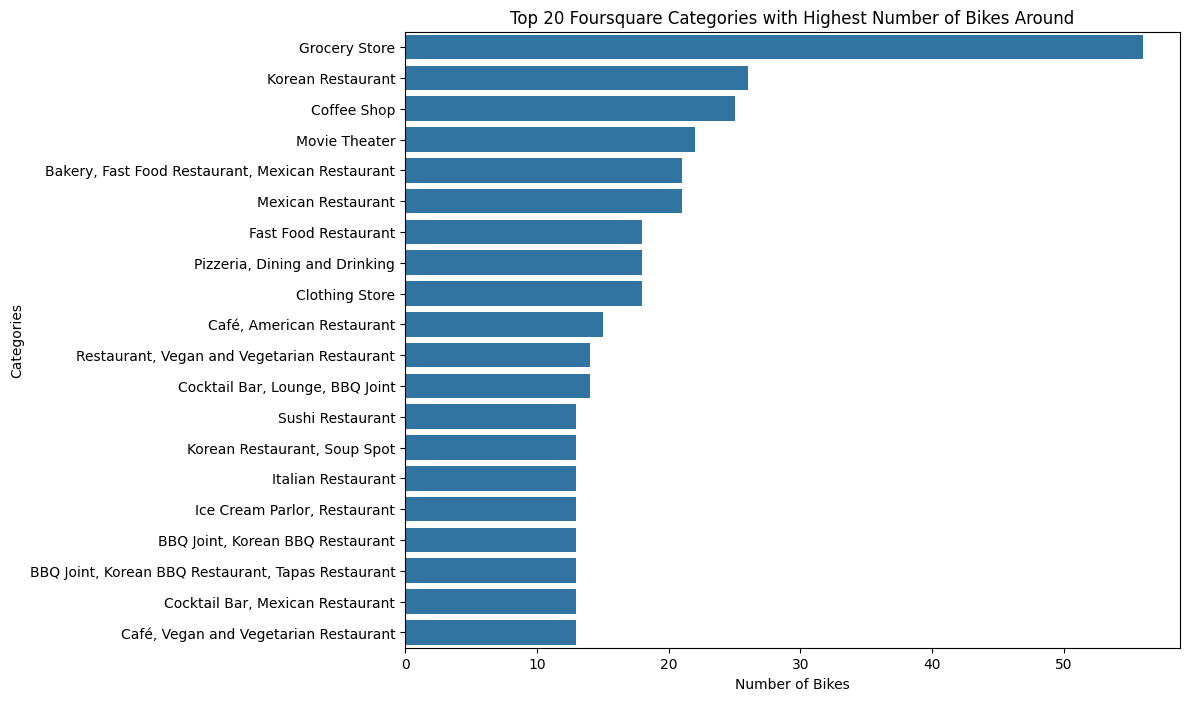

In [51]:
# Plot for Yelp categories
plt.figure(figsize=(10, 8))
sns.barplot(data=df_close_categories_yelp.head(20), y='categories', x='Number of Bikes')
plt.title('Top 20 Yelp Categories with Highest Number of Bikes Around')
plt.ylabel('Categories')
plt.xlabel('Number of Bikes')
plt.show()

# Plot for Foursquare categories
plt.figure(figsize=(10, 8))
sns.barplot(data=df_close_categories_fsq.head(20), y='categories', x='Number of Bikes')
plt.title('Top 20 Foursquare Categories with Highest Number of Bikes Around')
plt.ylabel('Categories')
plt.xlabel('Number of Bikes')
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [53]:
# Saving onto csv files

df_close_businesses_yelp.to_csv('close_businesses_yelp.csv', index=False)
df_close_businesses_fsq.to_csv('close_businesses_fsq.csv', index=False)
df_close_categories_yelp.to_csv('close_categories_yelp.csv', index=False)
df_close_categories_fsq.to_csv('close_categories_fsq.csv', index=False)
yelp_bikes_merged.to_csv('yelp_bikes_merged.csv', index=False)
fsq_bikes_merged.to_csv('fsq_bikes_merged.csv', index=False)

In [54]:
sorted_close_businesses_yelp.to_csv('sorted_close_businesses_yelp.csv', index=False)
sorted_close_businesses_fsq.to_csv('sorted_close_businesses_fsq.csv', index=False)

Look at the data before and after the join to validate your data.

In [ ]:
# Reminder, do not run this code, everything has been completed on a different file within the data folder
# Used this code on SQLite to get my files there:

.....................................

import sqlite3
import pandas as pd

conn = sqlite3.connect('mysql_project.db')

df_yelp = pd.read_csv('yelp_dataframe.csv')
df_fsq = pd.read_csv('foursquare_dataframe.csv')
df_yelp_copy = pd.read_csv('yelp_clean_copy_dataframe.csv')
df_fsq_copy = pd.read_csv('foursquare_clean_copy_dataframe.csv')
df_citybikes = pd.read_csv('citybikes_dataframe.csv')
df_close_businesses_yelp = pd.read_csv('close_businesses_yelp.csv')
df_close_businesses_fsq = pd.read_csv('close_businesses_fsq.csv')
df_close_categories_yelp = pd.read_csv('close_categories_yelp.csv')
df_close_categories_fsq = pd.read_csv('close_categories_fsq.csv')
yelp_bikes_merged = pd.read_csv('yelp_bikes_merged.csv')
fsq_bikes_merged = pd.read_csv('fsq_bikes_merged.csv')

# I've given them table names below

df_yelp.to_sql('yelp', conn, if_exists='replace', index=False)
df_fsq.to_sql('foursquare', conn, if_exists='replace', index=False)
df_yelp_copy.to_sql('yelp_copy', conn, if_exists='replace', index=False)
df_fsq_copy.to_sql('foursquare_copy', conn, if_exists='replace', index=False)
df_citybikes.to_sql('citybikes', conn, if_exists='replace', index=False)
df_close_businesses_yelp.to_sql('close_businesses_yelp', conn, if_exists='replace', index=False)
df_close_businesses_fsq.to_sql('close_businesses_fsq', conn, if_exists='replace', index=False)
df_close_categories_yelp.to_sql('close_categories_yelp', conn, if_exists='replace', index=False)
df_close_categories_fsq.to_sql('close_categories_fsq', conn, if_exists='replace', index=False)
yelp_bikes_merged.to_sql('yelp_bikes_merged', conn, if_exists='replace', index=False)
fsq_bikes_merged.to_sql('fsq_bikes_merged', conn, if_exists='replace', index=False)

conn.close()

.....................................
